<a href="https://colab.research.google.com/github/ddekun/Data_analysis_algorithms/blob/lesson7/hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Алгоритмы анализа данных

## Урок 7. Классификация с помощью KNN. Кластеризация K-means

### Домашнее задание
К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях k. 2*. Напишите функцию по подсчёту метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от k (взять от 1 до 10) для выборки данных из этого урока.

In [ ]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
%matplotlib inline

In [ ]:
X, y = load_iris(return_X_y=True)
# Возьмем первые три признака (всего в датасете их 4)
X = X[:, :3]

In [ ]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=1)

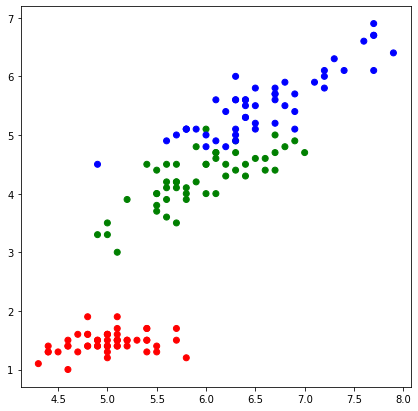

In [ ]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 2], c=y, cmap=cmap)

In [ ]:
# Функция подсчёта Евклидовой метрики
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [ ]:
# Алгоритм поиска k ближайших соседей
def knn(x_train, y_train, x_test, k):
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем "вес" каждого класса, зависимый от расстояния
        for d in sorted(test_distances)[0:k]:
            #classes[d[1]] += 1
            classes[d[1]] += 0.5**d[0]
            
        # Записываем в список ответов наиболее "весомый" класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [ ]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [ ]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.6f}')

Точность алгоритма при k = 5: 0.921053


In [ ]:
from sklearn.datasets import make_blobs, make_moons
import random

X, y = make_blobs(n_samples=100, random_state=1)
# X, y = make_moons(n_samples=50, noise=0.02, random_state=1)

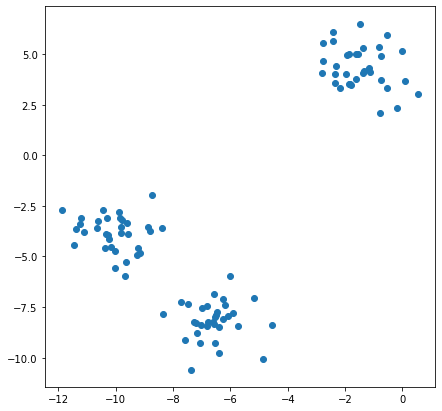

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

В качестве метрики расстояния будем использовать евклидово расстояние, функция для которого была написана ранее. В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [ ]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для кластеризации
    clusters = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # кластеризуем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, clusters

In [ ]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'y']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
            
    plt.show()

In [ ]:
# определим максимальное количество итераций
max_iterations = 2

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

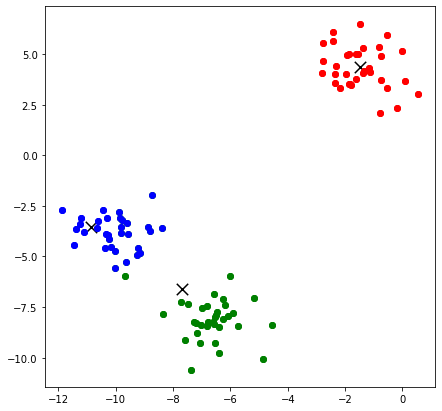

CPU times: user 3.05 s, sys: 146 ms, total: 3.2 s
Wall time: 3.59 s


In [ ]:
%%time
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

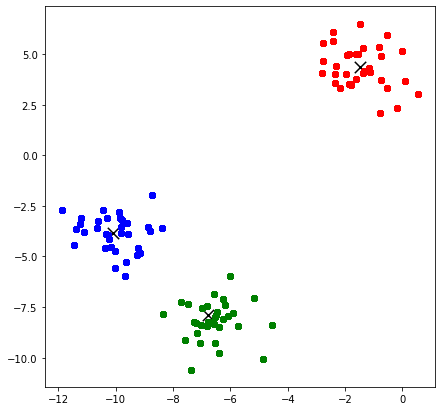

CPU times: user 16.4 s, sys: 293 ms, total: 16.7 s
Wall time: 28.9 s


In [ ]:
%%time
max_iterations = 10

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [ ]:
def mean_square_cluster(clusters, centroids):
    rezult = 0
    for cluster, data in clusters.items():
        distance = 0
        for x in data:
            distance += e_metrics(centroids[cluster], x) ** 2
        distance /= len(data)
        rezult += distance
    return rezult

In [ ]:
num_clusters = range(1, 10) # на 1 меньше для наглядности
errors = []

for k in num_clusters:
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    errors.append(mean_square_cluster(clusters, centroids))

Text(0, 0.5, 'Среднее квадратичное внутрикластерное расстояние')

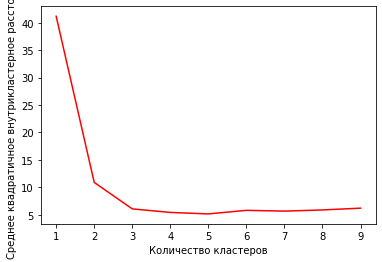

In [ ]:
plt.plot(num_clusters, errors, color = 'r')
plt.xlabel('Количество кластеров')
plt.ylabel('Среднее квадратичное внутрикластерное расстояние')